# Single Layer CV QNN

In this tutorial, we will look at the continuous variable circuit architecture provided by PennyLane; [CVNeuralNetLayers](https://pennylane.readthedocs.io/en/latest/code/templates/layers.html#pennylane.templates.layers.CVNeuralNetLayers). This is the quantum analogue of a classical Neural Network. 

<div class="admonition important">
<div class="admonition-title">Important</div>
    
For continuous variable computing, PennyLane provides a simplified circuit architecture template using the universal gate set containing Interferometers (made of single-qumode rotation and 2-qumode Beam Splitter gates), Squeezing gates, Displacement gates and non-Gaussian gates.

</div>
</div>

PennyLane's `CVNeuralNetLayers` template can be used to implement a Quantum Neural Network (QNN) circuit. A single layer is implemented by the template `CVNeuralNetLayer`. It contains two Interferometers, local squeezing, local displacement and local Kerr gates acting on all qumodes. Hence, the template function needs eleven input arguments with all parametrs initialized with the right dimensions. This is why using the built-in template to initialize parameters can come in very handy. 

Let's implement the following single layer circuit on 4 qumodes to understand how these templates works.

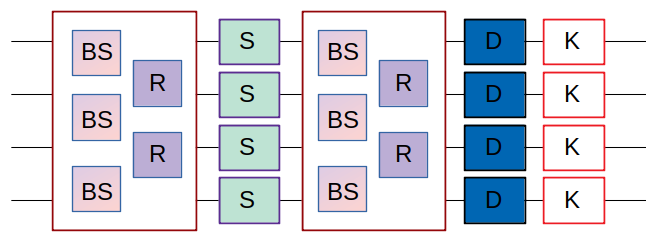

In [5]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates.layers import CVNeuralNetLayer
from pennylane.init import cvqnn_layer_uniform

<div class="admonition note">
<div class="admonition-title">Note</div>

For the Kerr operation, a suitable device should be used such as the `strawberryfields.fock` device.    
 
</div>
</div>

In [2]:
n_wires = 4

dev = qml.device('strawberryfields.fock', wires=n_wires,cutoff_dim=8)

# initialize parameters
pars = cvqnn_layer_uniform(n_wires)
print(pars)

@qml.qnode(dev)
def circuit(pars):
    CVNeuralNetLayer(*pars, wires=range(n_wires))
    return [qml.expval.MeanPhoton(wires=w) for w in range(n_wires)]


[array([2.61467562, 3.2371544 , 2.39636553, 3.3069315 , 1.71942329,
       2.23407894]), array([3.08895824, 5.18375857, 2.65491782, 4.18073044, 5.54849448,
       4.02551326]), array([3.9868442 , 2.72366934, 2.58366073, 2.97040392]), array([ 0.20247638,  0.04394124, -0.02263603, -0.00584289]), array([3.23375673, 6.08161587, 2.07426891, 6.22371632]), array([3.38820135, 2.24947009, 0.02053007, 2.93713089, 6.26890416,
       0.81671074]), array([4.57224344, 5.15390558, 3.98982271, 3.86910136, 3.98449492,
       2.68450659]), array([5.82997086, 6.26875476, 5.95598548, 5.9361312 ]), array([ 0.12620595,  0.01095255, -0.16871207, -0.02344182]), array([5.11870587, 0.43539138, 3.37922203, 5.66559641]), array([ 0.08173526, -0.07799196,  0.04952914,  0.01706851])]


Note: For 4 qumodes, each Interferometer applies $\frac{(4)(3)}{2}= 6$ Beam Splitters and 4 Rotation gates. 

Let's understand what `cvqnn_layer_uniform` function output `pars` contains:

- array 1: 6 theta for the 6 BS gates on first interferometer
- array 2: 6 phi for the 6 BS gates on first interferometer
- array 3: 4 varphi for the 4 Rotation gates on first interferometer
- array 4: 4 squeezing magnitudes for the 4 squeezing gates
- array 5: 4 squeezing phases for the 4 squeezing gates
- array 6: 6 theta for the 6 BS gates on second interferometer
- array 7: 6 phi for the 6 BS gates on second interferometer
- array 8: 4 varphi for the 4 Rotation gates on second interferometer
- array 9: 4 displacement magnitudes for the 4 displacement gates
- array 10: 4 displacement phases for the 4 displacement gates
- array 11: 4 Kerr parameters for the 4 Kerr gates

<div class="admonition note">
<div class="admonition-title">Note</div>

The displacement amplitude, squeezing amplitude and kerr parameter values are initialized close to zero since they influence the mean photon number (or energy) of the quantum system.
</div>

In [3]:
circuit(pars)

array([0.05652615, 0.00162837, 0.03006308, 0.00087608])